In [4]:
import numpy as np
import matplotlib.pyplot as plt
import requests 
import yfinance as yf
import pandas as pd
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from io import StringIO

In [5]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data
    revenue_data_specific = revenue_data
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

# **Question 1 - Extracting Tesla Stock Data Using yfinance**

In [7]:
tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max")
tesla_data.reset_index(inplace=True)
tesla_data.head()
stock_data_tesla = tesla_data.iloc[:,[0,4]]

# **Question 2 - Extracting Tesla Revenue Data Using Webscraping**

In [11]:
url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'}
response = requests.get(url, headers=headers)
html_content = StringIO(response.text)
tables = pd.read_html(html_content)
revenue_data_tesla = tables[1]
revenue_data_tesla.columns = ["Date","Revenue"]
revenue_data_tesla.loc[:,"Date"] = pd.to_datetime(revenue_data_tesla.loc[:,"Date"])
revenue_data_tesla.loc[:,"Revenue"] = revenue_data_tesla.loc[:,"Revenue"]\
    .str.replace("$","",regex=False)\
    .str.replace(",","",regex=False)\
    .astype(np.float64)

# **Question 3 - Extracting GameStop Stock Data Using yfinance**

In [13]:
gme = yf.Ticker("GME")
gme_data = gme.history(period="max")
gme_data.reset_index(inplace=True)
stock_data_gme = gme_data.iloc[:,[0,4]]

# **Question 4 - Extracting GameStop Revenue Data Using Webscraping**

In [15]:
url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'}
response = requests.get(url, headers=headers)
html_content = StringIO(response.text)
tables = pd.read_html(html_content)
revenue_data_gme = tables[1]
revenue_data_gme.columns = ["Date","Revenue"]
revenue_data_gme.loc[:,"Date"] = pd.to_datetime(revenue_data_gme.loc[:,"Date"])
revenue_data_gme.loc[:,"Revenue"] = revenue_data_gme.loc[:,"Revenue"]\
    .str.replace("$","",regex=False)\
    .str.replace(",","",regex=False)\
    .astype(np.float64)

# **Question 5 - Tesla Stock and Revenue Dashboard**

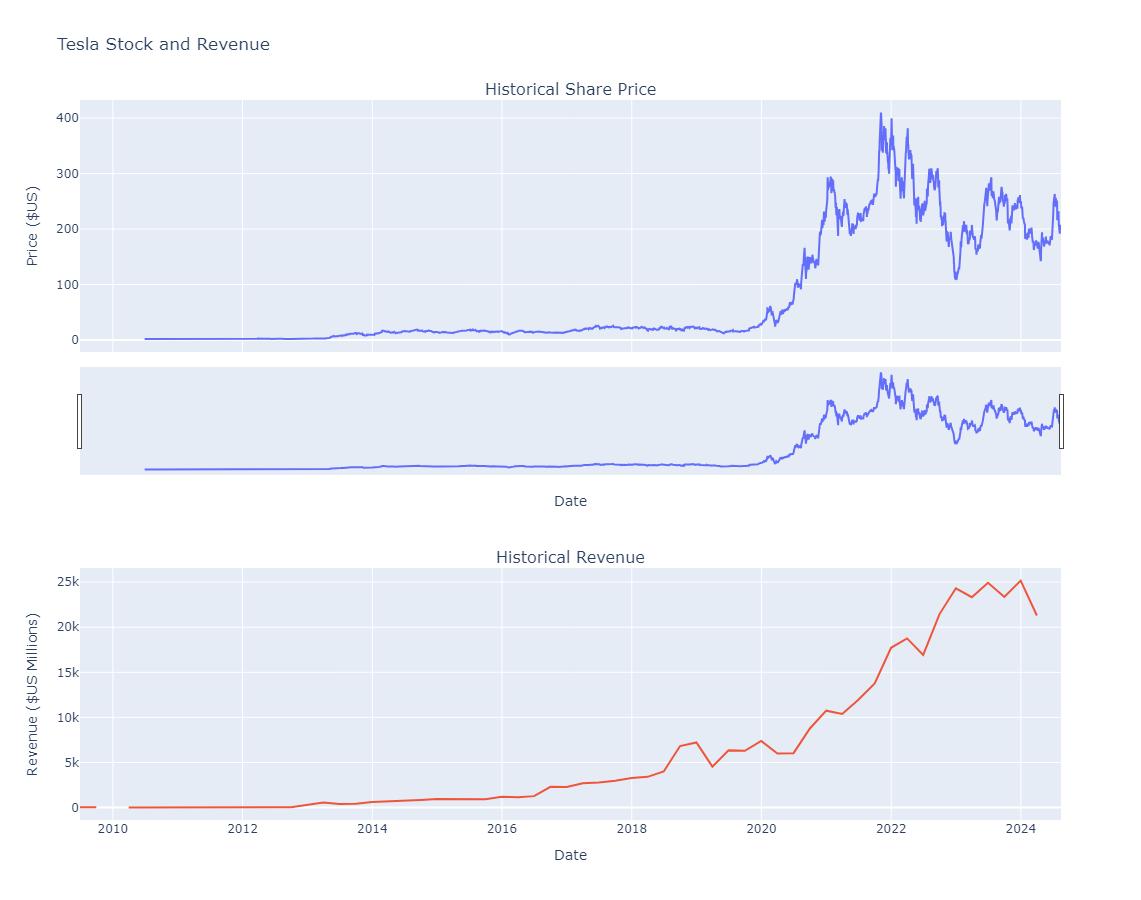

In [29]:
make_graph(stock_data_tesla, revenue_data_tesla, "Tesla Stock and Revenue")  

# **Question 6 - GameStop Stock and Revenue Dashboard**

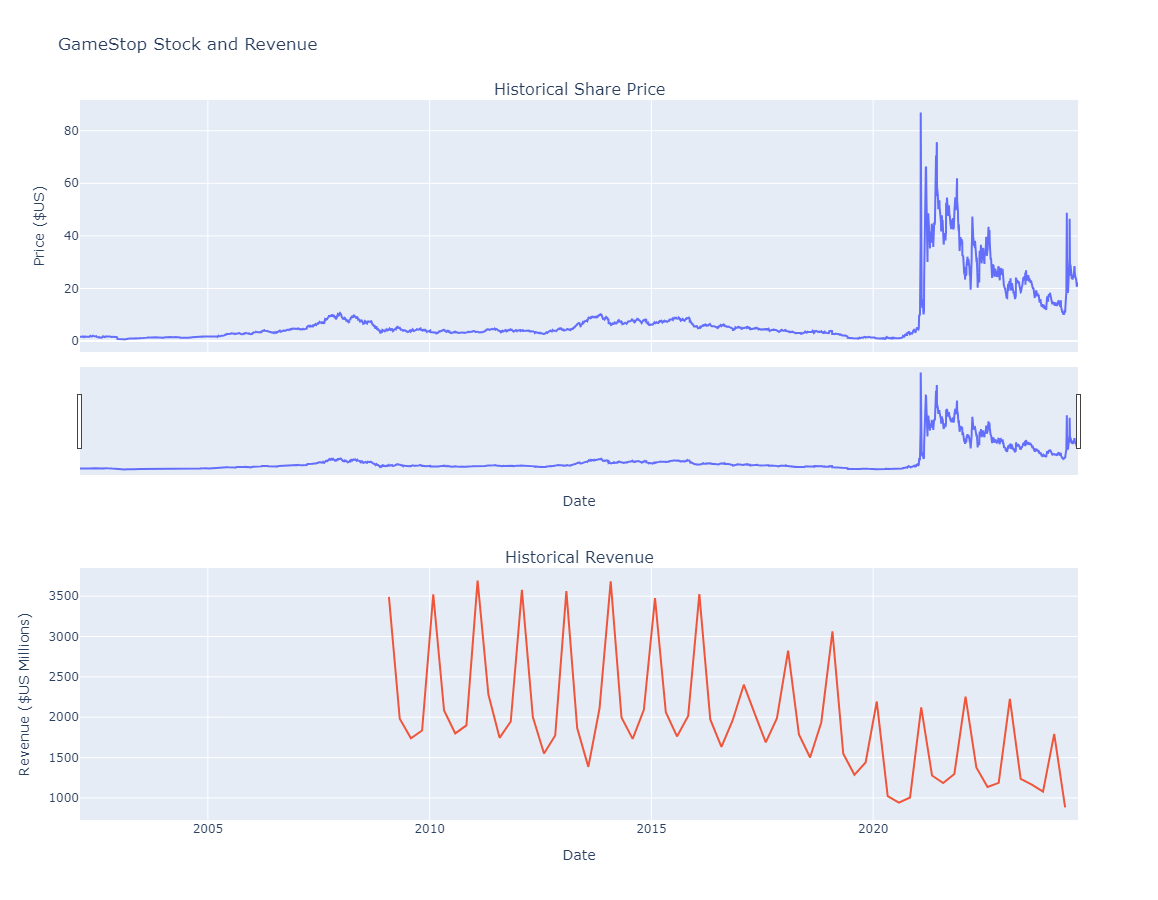

In [27]:
make_graph(stock_data_gme, revenue_data_gme, "GameStop Stock and Revenue")  